In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime


In [2]:
#load datasests
daily_data = pd.read_csv('../data/daily_data.csv', index_col='date')
monthly_data = pd.read_csv('../data/monthly_data.csv', index_col='Unnamed: 0')
daily_data.tail()

,wti_oil,al_3m,disiel_us,ng_us,coal_newcastle,fuel_oil_rotterdam,brent_oil,us_gasoline,elec_price_netherlands,elec_price_germany,...,soda_usgulf,soda_asia_cfr,soda_asia_fob,soda_weurope,soda_china,aa_price_future,aa_price,aa_price_china_smm,aa_price_china_am,Fluorspar_china
date,,,,,,,,,,,,,,,,,,,,,
29/12/2020,48.00,1991.0,2.635,2.467,84.20,285.600,51.09,2.251,50.71,47.07,...,225,266.0,240.0,482.58,74.19,271.73,300.0,356.77,363.66,394.29
30/12/2020,48.40,1999.5,2.635,2.422,81.60,287.325,51.34,2.253,52.00,46.70,...,225,266.0,240.0,482.58,74.19,271.73,300.0,357.18,364.07,394.73
31/12/2020,48.52,1979.5,2.635,2.539,80.50,287.225,51.80,2.254,48.40,48.40,...,225,266.0,240.0,482.58,74.19,271.73,303.5,356.97,363.86,394.50
01/01/2021,48.52,1979.5,2.635,2.539,80.50,287.225,51.80,2.255,50.56,50.56,...,225,266.0,240.0,482.58,74.19,271.73,303.5,356.97,363.86,394.50
04/01/2021,48.70,2020.0,2.635,2.625,81.75,287.225,52.19,2.256,50.39,55.34,...,225,266.0,240.0,482.58,74.19,271.73,303.5,360.63,367.59,398.55


In [3]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5481 entries, 03/01/2000 to 04/01/2021
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wti_oil                 5481 non-null   float64
 1   al_3m                   5481 non-null   float64
 2   disiel_us               5481 non-null   float64
 3   ng_us                   5481 non-null   float64
 4   coal_newcastle          1315 non-null   float64
 5   fuel_oil_rotterdam      1318 non-null   float64
 6   brent_oil               5481 non-null   float64
 7   us_gasoline             4396 non-null   float64
 8   elec_price_netherlands  5481 non-null   float64
 9   elec_price_germany      5363 non-null   float64
 10  elec_price_france       4986 non-null   float64
 11  elec_price_spain        5481 non-null   float64
 12  elec_price_indiana      2350 non-null   float64
 13  elec_price_midcol       5217 non-null   float64
 14  elec_price_pjm          4477 n

In [4]:
monthly_data.tail()

,alf3_price,anode_china_dom,cryolite_china_dom,anode_aluchemie,anode_china_export
Aug-20,987.0,402,749.0,590.0,470
Sep-20,1013.0,419,766.0,590.0,470
Oct-20,1073.0,425,767.0,590.0,470
Nov-20,1207.0,465,778.0,590.0,470
Dec-20,1247.0,493,791.0,590.0,550


In [5]:
monthly_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, Feb-10 to Dec-20
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   alf3_price          130 non-null    float64
 1   anode_china_dom     131 non-null    int64  
 2   cryolite_china_dom  121 non-null    float64
 3   anode_aluchemie     27 non-null     float64
 4   anode_china_export  131 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 6.1+ KB


In [13]:
#daily_data.index = pd.to_datetime(daily_data.index).strftime('%b-%Y')

#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']



In [16]:
def make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label):
    '''Plot a line chart of two series in different axis'''
    
    fig, ax1 = plt.subplots()
    plt.title(title, loc='left', fontdict={'fontsize': 24, 'fontweight': 50, 'color': 'grey'})
    
    fig.set_figheight(6)
    fig.set_figwidth(12)


    color = 'tab:grey'
    #ax1.set_xlabel('date')
    ax1.set_ylabel(left_ylabel, color=color, fontsize=12)
    ax1.plot(daily_data[left_series], color=color, label=left_label)
    ax1.tick_params(axis='y', labelcolor=color, labelsize='large')
    ax1.tick_params(axis='x', labelcolor='black', labelsize='large')
    #ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_xticks(np.arange(0, len(daily_data[left_series] + 1), 365*2))
    ax1.set_yticks(np.arange(np.min(daily_data[left_series]) - 0.01 * np.min(daily_data[left_series]) , \
                             np.max(daily_data[left_series]) + 0.01 * np.max(daily_data[left_series]), \
                             (np.max(daily_data[left_series]) - np.min(daily_data[left_series])) / 4))
    plt.legend(loc='upper left')


    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel(right_ylabel, color=color, fontsize=12)  
    ax2.plot(daily_data[right_series], color=color, label=right_label)
    ax2.tick_params(axis='y', labelcolor=color, labelsize='large')
    ax2.tick_params(axis='x', labelcolor='black', labelsize='large')
    #ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.set_xticks(np.arange(0, len(daily_data[right_series] + 1), 365*2))
    ax2.set_yticks(np.arange(np.min(daily_data[right_series]) - 0.01 * np.min(daily_data[right_series]) , \
                             np.max(daily_data[right_series]) + 0.01 * np.max(daily_data[right_series]), \
                             ((np.max(daily_data[right_series]) - np.min(daily_data[right_series])) / 4)))
    plt.legend(loc='upper right')


    fig.tight_layout()  
    plt.show()

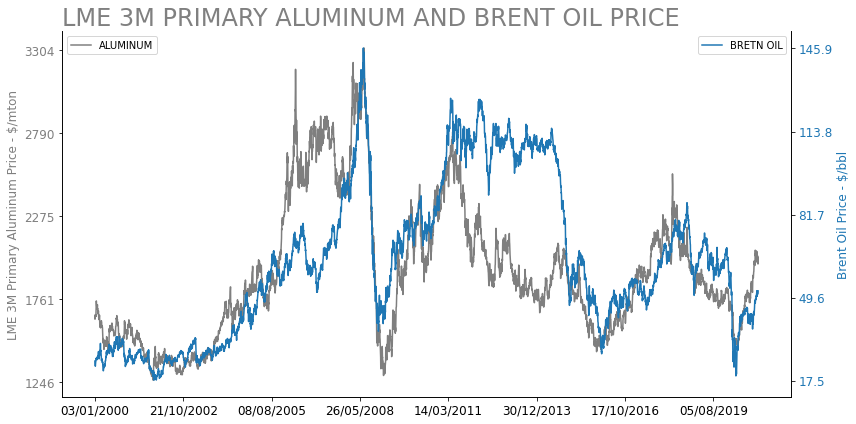

In [14]:
title = 'LME 3M PRIMARY ALUMINUM AND BRENT OIL PRICE'
left_ylabel = 'LME 3M Primary Aluminum Price - $/mton'
left_series = 'al_3m'
left_label = 'ALUMINUM'
right_ylabel = 'Brent Oil Price - $/bbl'
right_series = 'brent_oil'
right_label = 'BRETN OIL'

make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label)

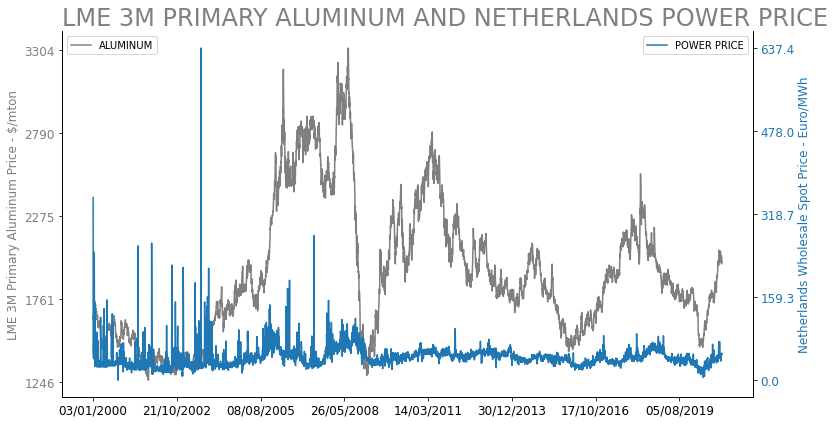

In [9]:
title = 'LME 3M PRIMARY ALUMINUM AND NETHERLANDS POWER PRICE'
left_ylabel = 'LME 3M Primary Aluminum Price - $/mton'
left_series = 'al_3m'
left_label = 'ALUMINUM'
right_ylabel = 'Netherlands Wholesale Spot Price - Euro/MWh'
right_series = 'elec_price_netherlands'
right_label = 'POWER PRICE'

make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label)

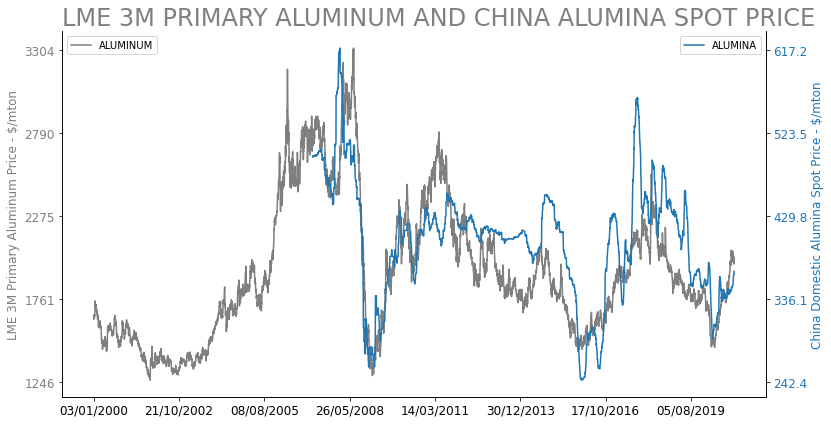

In [10]:
title = 'LME 3M PRIMARY ALUMINUM AND CHINA ALUMINA SPOT PRICE'
left_ylabel = 'LME 3M Primary Aluminum Price - $/mton'
left_series = 'al_3m'
left_label = 'ALUMINUM'
right_ylabel = 'China Domestic Alumina Spot Price - $/mton'
right_series = 'aa_price_china_am'
right_label = 'ALUMINA'

make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label)

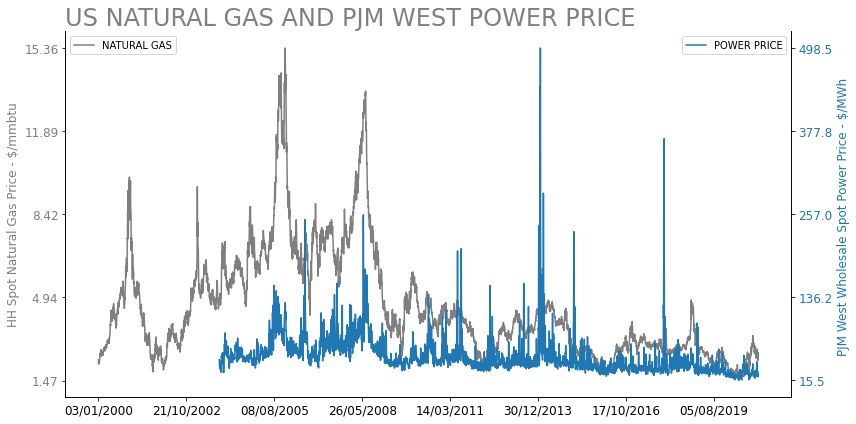

In [11]:
title = 'US NATURAL GAS AND PJM WEST POWER PRICE'
left_ylabel = 'HH Spot Natural Gas Price - $/mmbtu'
left_series = 'ng_us'
left_label = 'NATURAL GAS'
right_ylabel = 'PJM West Wholesale Spot Power Price - $/MWh '
right_series = 'elec_price_pjm'
right_label = 'POWER PRICE'

make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label)


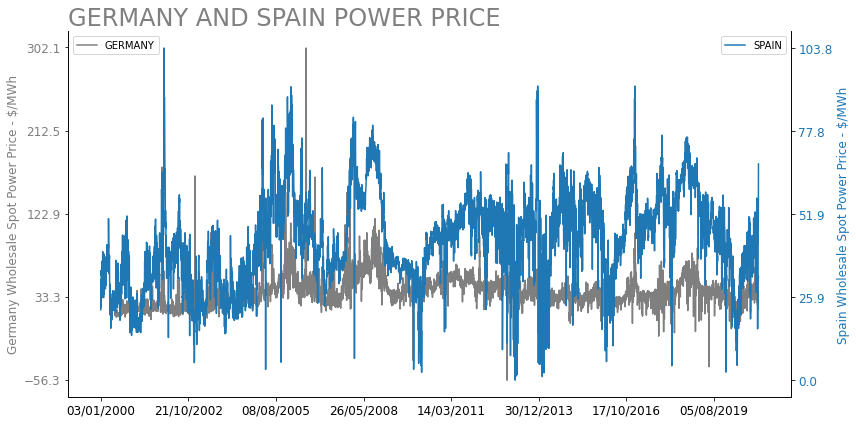

In [12]:
title = 'GERMANY AND SPAIN POWER PRICE'
left_ylabel = 'Germany Wholesale Spot Power Price - $/MWh'
left_series = 'elec_price_germany'
left_label = 'GERMANY'
right_ylabel = 'Spain Wholesale Spot Power Price - $/MWh'
right_series = 'elec_price_spain'
right_label = 'SPAIN'

make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label)

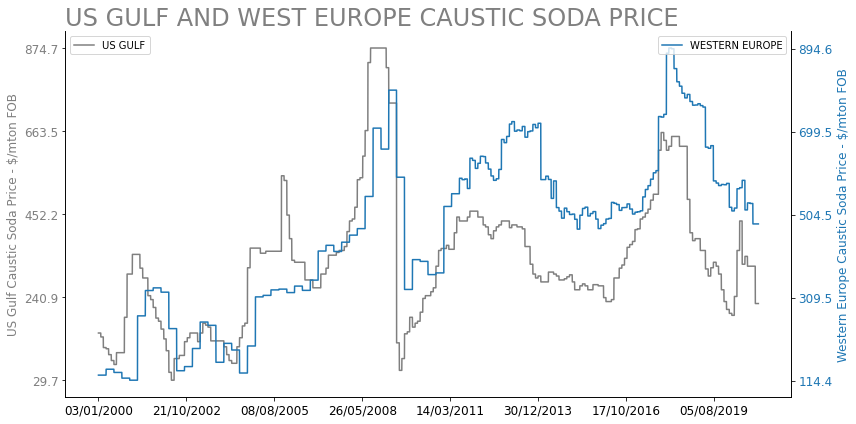

In [17]:
title = 'US GULF AND WEST EUROPE CAUSTIC SODA PRICE'
left_ylabel = 'US Gulf Caustic Soda Price - $/mton FOB'
left_series = 'soda_usgulf'
left_label = 'US GULF'
right_ylabel = 'Western Europe Caustic Soda Price - $/mton FOB'
right_series = 'soda_weurope'
right_label = 'WESTERN EUROPE'

make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label)

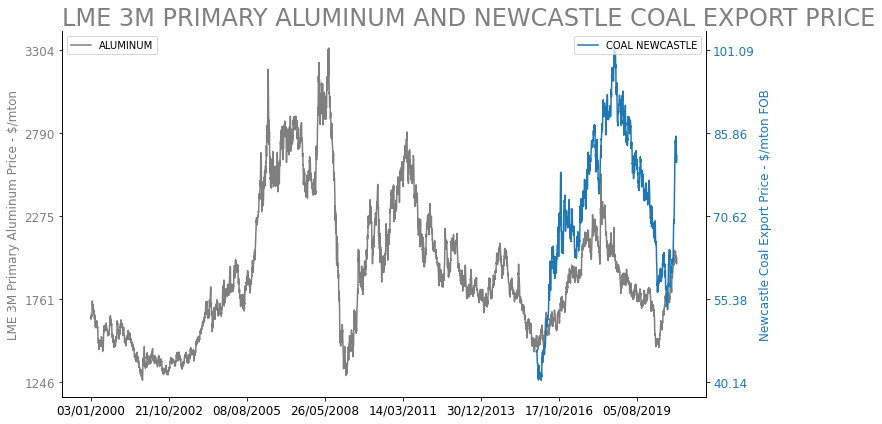

In [19]:
title = 'LME 3M PRIMARY ALUMINUM AND NEWCASTLE COAL EXPORT PRICE'
left_ylabel = 'LME 3M Primary Aluminum Price - $/mton'
left_series = 'al_3m'
left_label = 'ALUMINUM'
right_ylabel = 'Newcastle Coal Export Price - $/mton FOB'
right_series = 'coal_newcastle'
right_label = 'COAL NEWCASTLE'

make_2line_chart(title, left_ylabel, left_series, left_label, right_ylabel, right_series, right_label)